<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa_after/PSD_histogram_BEST_sample_08_just_last_grains_jan_17_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [59]:
Repetir = 40

In [60]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4

In [61]:
#!pip install mahotas

In [62]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [63]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 485 (delta 109), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (485/485), 166.45 MiB | 24.39 MiB/s, done.
Resolving deltas: 100% (232/232), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado


In [64]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [65]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [66]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.50 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines


In [67]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [68]:
FILE='SugarSample08_new.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=',' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=',' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [69]:
df_ImgJ.head()

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047


In [70]:
name

'sample_08_03.csv'

In [71]:
f.namelist()

['sample_08_01.csv', 'sample_08_02.csv', 'sample_08_03.csv']

In [72]:
#df_ImgJ.head()

In [73]:
#df_ImgJ.head()

In [74]:
from Segment_Filter_Reviseted_2022 import Segmenta  # got image provided segmented

In [75]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 225 (delta 93), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.60 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [76]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [77]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [78]:
Img_Size = 28

In [79]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [80]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 2s 112ms/step - loss: 0.4789 - accuracy: 0.7901 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 89ms/step - loss: 0.2341 - accuracy: 0.9125 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 89ms/step - loss: 0.2093 - accuracy: 0.9213 - val_loss: 0.6949 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 88ms/step - loss: 0.1241 - accuracy: 0.9621 - val_loss: 0.6961 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 88ms/step - loss: 0.1123 - accuracy: 0.9621 - val_loss: 0.6983 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 89ms/step - loss: 0.0512 - accuracy: 0.9883 - val_loss: 0.6971 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 89ms/step - loss: 0.0595 - accuracy: 0.9796 - val_loss: 0.6999 - val_accuracy: 0.5102
Epoch

In [81]:
Y_test = yback(Y_test)

In [82]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        69   3
1         3  72


In [83]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.96      0.96      0.96        75

    accuracy                           0.96       147
   macro avg       0.96      0.96      0.96       147
weighted avg       0.96      0.96      0.96       147



In [84]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [85]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [86]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [87]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,36.810143,38.793781,40.094990,41.971737,43.730476,44.769997,44.634541,46.540218,47.123684,54.030922,87.384117,89.864754,88.401703,87.322670,94.024429,93.780411,94.158340,93.632950,97.780930,105.035172,108.681580,108.976929,110.100052,111.183357,108.688507,106.337471,108.094650,112.877060,25.966270,27.615368,29.130306,30.527332,34.574162,41.444889,43.379871,46.964134,47.529594,51.266842,91.610725,90.660698,...,78.439728,50.767433,66.318794,77.507469,86.248383,88.773941,84.518303,82.795334,86.418182,88.068741,85.699303,90.178421,85.667007,97.531738,102.819511,110.619461,108.576973,96.284431,98.795769,102.152687,105.468407,103.208206,93.314613,87.241356,87.566261,87.445686,89.574409,87.637955,72.229538,68.028938,72.031258,80.620010,90.019569,92.805557,90.260742,87.558441,88.411407,87.954094,88.900734,87.322281
1,54.049995,57.830536,76.169624,81.446472,90.821838,130.891159,116.356949,87.708458,85.060066,84.276520,82.916077,75.650604,73.070770,76.068260,78.797905,79.128403,80.043671,80.965996,80.482590,75.398582,67.686554,56.444931,48.349483,47.731354,47.821690,48.977760,48.761219,49.427399,56.711796,57.077019,70.727699,79.170845,94.037338,122.596527,112.740852,90.650917,85.292671,84.873711,85.486488,80.040016,...,54.557014,53.630787,52.975731,51.565945,53.656116,54.496788,59.242916,63.203312,65.647514,64.872414,64.951462,65.618782,53.375294,104.254929,112.652145,111.836617,101.143417,91.347626,84.575119,81.741417,80.301598,79.691574,76.492004,70.623650,62.256313,59.563343,56.863403,53.641914,53.106808,52.845467,51.839462,48.349972,42.363037,35.629009,55.796928,63.483646,64.694832,66.511078,65.045769,65.829315
2,27.909088,36.340164,39.693222,38.528267,37.993721,38.153717,39.162315,41.500824,43.473717,44.848923,46.091568,78.336189,91.944130,98.648262,101.953384,101.844292,94.746773,91.633385,91.997360,94.611572,99.174866,100.506447,100.337517,100.157013,93.598015,81.285950,74.274048,72.528595,28.487602,36.824795,40.097847,38.862808,37.019173,35.649254,36.849590,40.129585,42.948761,46.193718,50.330250,80.274048,...,157.317032,124.950729,52.981815,46.628757,58.017517,56.608593,56.321320,56.621483,57.116695,56.314709,59.773884,62.403305,125.158348,131.558334,137.925949,142.182480,144.397690,146.043304,144.648590,144.288269,148.567261,154.278351,162.830414,170.015854,173.808258,177.675354,181.837021,180.973572,172.273712,145.458511,72.710083,40.012562,56.506775,56.252232,55.918015,56.911072,57.681980,57.758018,59.749420,60.801323
3,84.612450,79.118637,70.143066,62.301178,60.270973,61.375793,63.639378,64.716728,64.534393,67.249756,69.406555,72.781677,74.750031,73.187012,66.705238,65.341003,70.543282,71.824715,74.417885,76.330338,76.637566,73.334816,67.544685,57.526245,50.167522,50.625080,52.851849,54.625244,73.267593,69.694214,64.890312,60.958736,60.713753,61.597786,62.572987,63.287884,64.552437,66.517220,69.506462,71.368790,...,103.356041,95.738739,85.951859,74.404190,66.522865,66.869751,66.434990,64.235458,63.680046,62.802498,62.304752,67.159241,85.576530,94.208366,98.626717,91.365395,86.164154,87.784256,91.980011,94.558723,100.089104,102.276688,103.663269,105.638535,108.472878,109.030457,107.936302,104.886482,102.795837,103.865509,109.516281,112.095261,103.786453,84.726212,67.206749,64.413948,63.490131,65.607796,65.517761,68.339165
4,125.489212,109.167351,50.674343,46.667763,49.498432,49.566360,50.093658,51.668533,51.353142,54.066223,54.766640,54.935413,60.280930,63.446911,64.444878,66.872307,68.119118,69.489655,71.539253,71.556046,67.239227,37.382988,1.699149,0.883237,0.976955,0.792593,0.105679,0.000000,123.867157,112.928658,62.149792,46.694099,47.999176,48.975960,50.471275,50.604610,51.803398,53.759941,55.061398,57.160271,...,1.000000,0.887517,0.809877,0.964609

In [88]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [89]:
#df_ann

In [90]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [91]:
img_graos.shape

(126, 785)

In [92]:
prediction

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [93]:
img_graos.shape

(126, 785)

In [94]:
Width=np.array(Width_new)

In [95]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

#from Get_PSDArea_Revival import PSDArea
from Get_PSDArea_Reviseted_2022 import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 885, done.
remote: Counting objects: 100% (646/646), done.
remote: Compressing objects: 100% (644/644), done.
remote: Total 885 (delta 426), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (885/885), 6.48 MiB | 1.77 MiB/s, done.
Resolving deltas: 100% (563/563), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [96]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (223/223), done.
remote: Total 225 (delta 93), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (225/225), 211.77 MiB | 20.16 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Checking out files: 100% (58/58), done.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  0.807
1   2  1.407
2   3  1.177


''

In [97]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [98]:
Width.shape

(126,)

In [99]:
Width

array([181, 111, 173, 117, 104, 129, 171, 131, 152, 187, 117, 122, 122,
       186, 113, 154, 167, 118, 184, 121, 161, 171, 140, 123, 178, 164,
       200, 138, 136, 153, 168, 106, 128, 162, 167, 115, 169, 100, 165,
       161, 130, 183, 100, 149, 125, 142, 191, 125, 170, 199, 160, 140,
       134, 107, 160, 110, 113, 120, 170, 119, 173, 198, 165, 155, 172,
       112, 107, 154, 169, 116, 104, 193, 180, 188, 133, 177, 196, 160,
       180, 138, 193, 131, 121, 173, 180, 127, 101, 178, 188, 197, 152,
       186, 182, 188, 124, 160, 174, 190, 168, 193, 105, 155, 178, 153,
       171, 105, 182, 139, 155, 127, 103, 159, 108, 149, 106, 161, 160,
       143, 102, 160, 191, 114, 167, 125, 141, 103])

In [100]:
img_graos.shape

(126, 785)

In [101]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,181.0,36.810143,38.793781,40.094990,41.971737,43.730476,44.769997,44.634541,46.540218,47.123684,54.030922,87.384117,89.864754,88.401703,87.322670,94.024429,93.780411,94.158340,93.632950,97.780930,105.035172,108.681580,108.976929,110.100052,111.183357,108.688507,106.337471,108.094650,112.877060,25.966270,27.615368,29.130306,30.527332,34.574162,41.444889,43.379871,46.964134,47.529594,51.266842,91.610725,...,78.439728,50.767433,66.318794,77.507469,86.248383,88.773941,84.518303,82.795334,86.418182,88.068741,85.699303,90.178421,85.667007,97.531738,102.819511,110.619461,108.576973,96.284431,98.795769,102.152687,105.468407,103.208206,93.314613,87.241356,87.566261,87.445686,89.574409,87.637955,72.229538,68.028938,72.031258,80.620010,90.019569,92.805557,90.260742,87.558441,88.411407,87.954094,88.900734,87.322281
1,111.0,54.049995,57.830536,76.169624,81.446472,90.821838,130.891159,116.356949,87.708458,85.060066,84.276520,82.916077,75.650604,73.070770,76.068260,78.797905,79.128403,80.043671,80.965996,80.482590,75.398582,67.686554,56.444931,48.349483,47.731354,47.821690,48.977760,48.761219,49.427399,56.711796,57.077019,70.727699,79.170845,94.037338,122.596527,112.740852,90.650917,85.292671,84.873711,85.486488,...,54.557014,53.630787,52.975731,51.565945,53.656116,54.496788,59.242916,63.203312,65.647514,64.872414,64.951462,65.618782,53.375294,104.254929,112.652145,111.836617,101.143417,91.347626,84.575119,81.741417,80.301598,79.691574,76.492004,70.623650,62.256313,59.563343,56.863403,53.641914,53.106808,52.845467,51.839462,48.349972,42.363037,35.629009,55.796928,63.483646,64.694832,66.511078,65.045769,65.829315
3,173.0,84.612450,79.118637,70.143066,62.301178,60.270973,61.375793,63.639378,64.716728,64.534393,67.249756,69.406555,72.781677,74.750031,73.187012,66.705238,65.341003,70.543282,71.824715,74.417885,76.330338,76.637566,73.334816,67.544685,57.526245,50.167522,50.625080,52.851849,54.625244,73.267593,69.694214,64.890312,60.958736,60.713753,61.597786,62.572987,63.287884,64.552437,66.517220,69.506462,...,103.356041,95.738739,85.951859,74.404190,66.522865,66.869751,66.434990,64.235458,63.680046,62.802498,62.304752,67.159241,85.576530,94.208366,98.626717,91.365395,86.164154,87.784256,91.980011,94.558723,100.089104,102.276688,103.663269,105.638535,108.472878,109.030457,107.936302,104.886482,102.795837,103.865509,109.516281,112.095261,103.786453,84.726212,67.206749,64.413948,63.490131,65.607796,65.517761,68.339165
6,117.0,97.269478,92.076859,94.870255,96.965370,96.496323,95.047997,92.603035,90.942139,89.042885,88.921616,79.461983,54.426548,31.137264,31.083059,31.642706,31.293814,37.185257,41.106804,45.212803,46.114548,47.112720,47.737164,50.051720,53.369717,55.293961,57.407925,58.428593,59.157497,85.984375,85.768867,87.414055,92.093437,92.825188,89.772369,88.330696,87.089996,84.243118,79.623055,69.517204,...,52.489151,42.646652,29.057491,25.855066,28.066769,28.769232,42.560081,57.544529,63.541676,63.134930,60.925709,62.722481,136.047256,136.747833,140.798004,146.076126,156.129745,167.507202,169.079849,152.772308,97.168602,70.145592,71.946892,72.144569,72.327927,69.664772,65.855507,56.346992,43.574844,27.392359,22.015779,21.837681,23.774273,25.272991,34.508659,49.274239,56.575645,60.300972,59.733219,61.509533
7,104.0,46.745567,43.980774,44.460060,44.544380,44.670120,45.013317,46.528111,47.094681,47.072487,48.211540,50.565086,51.369823,52.181957,55.254444,57.571007,55.482254,51.495567,56.473373,62.912727,67.928993,69.326920,72.144974,70.390541,66.109467,64.596161,63.331364,68.445267,75.289948,71.708588,47.949707,44.434914,44.476334,44.846157,45.301781,46.581367,47.255924,47.211540,48.423084,50.590240,...,90.473389,90.082855,93.335815,95.858002,99.859474,104.313622,109.41

In [102]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [103]:
 df_ImgJ

,Id \t,Area
0,3,1.031
1,4,1.852
2,5,1.530
3,6,1.354
4,7,1.047
...,...,...
74,37,0.901
75,38,1.165
76,39,1.264
77,40,1.021


In [104]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [105]:
len(Diameter_All)

126

In [106]:
#

#PSD_new['Area'].shape

In [107]:
#PSD_new.iloc[:,0]

In [108]:
'''
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 
'''

"\nArea2 = PSD_new['Area'].values\n#k = 0\nfor A in Area2:\n  Diam1.append((4*A/np.pi)**0.5)\n  #k = k + 1 \n"

In [109]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [110]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,1.145736,1.535591,1.395728,1.312999,1.154592,1.611253,1.292967,1.107307,1.694073,1.202134,1.199484,1.140724,1.484151,1.600947,1.619922,1.570435,1.303754,1.395728,1.476410,1.370876,1.354525,1.255496,1.378748,1.374123,1.410248,1.915588,1.039702,1.383358,1.487151,0.962105,1.454253,1.417003,1.194697,1.668705,1.071069,1.217918,1.268611,1.140166,1.385657,1.620315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.357809,0.893833,1.411791,0.930762,0.823517,0.848159,1.387285,0.870954,1.201731,1.450548,0.717258,0.830538,1.094072,1.172301,0.805582,1.139161,1.226500,0.668860,1.540566,0.681695,1.431529,1.488271,1.213760,0.988975,1.369519,1.292559,1.821570,0.882470,0.879973,1.194469,1.238290,0.761447,0.960218,1.231982,1.259271,0.757812,1.375110,0.734431,1.132668,1.319613,...,0.689019,1.360479,1.30382,1.500671,1.167552,1.639497,1.508933,1.347941,0.986449,1.282591,1.19198,1.485695,1.330296,1.784435,0.722277,1.234956,1.288271,0.966673,1.315661,0.764161,1.336665,1.120983,1.174773,0.951067,0.645987,1.126985,0.897944,1.155784,0.844551,1.171714,1.114117,1.141093,0.864618,1.17509,1.565504,0.840269,1.484878,1.071006,0.813633,0.695274


In [111]:
len(Diameter_All)

126

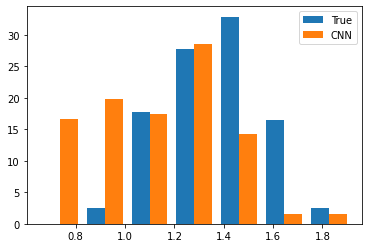

In [112]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [113]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.3621288326512706 desvio= 0.20110347688312627 pontos= 79


In [114]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.126357005199847 desvio= 0.2665167475153901 pontos= 126
